<a href="https://colab.research.google.com/github/daudibrahimhasan/Mart-Sale-Analysis/blob/main/MartSaleAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Datasets**

In [11]:
train_path = '/content/drive/MyDrive/datasets/sales2.csv'   # change if needed
test_path = '/content/drive/MyDrive/datasets/sales1.csv'

# Read CSV files
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display first 5 rows
print(train_data.head())

# Shapes of datasets
print('\nShape of training data :', train_data.shape)
print('\nShape of testing data :', test_data.shape)

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     6.800000         0.037490   48.6034                       2004   
1    15.600000         0.172597  114.8518                       1997   
2    12.911575         0.054721  107.8254                       1985   
3    11.800000         0.098312   81.4618                       1998   
4    17.850000         0.046600  125.1388                       2004   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0           291.6204                    0                         1   
1          2163.1842                    0                         1   
2          2387.5588                    0                         1   
3           161.1236                    0                         1   
4          1981.4208                    0                         0   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                         0                         0        

**Visualize dataset**

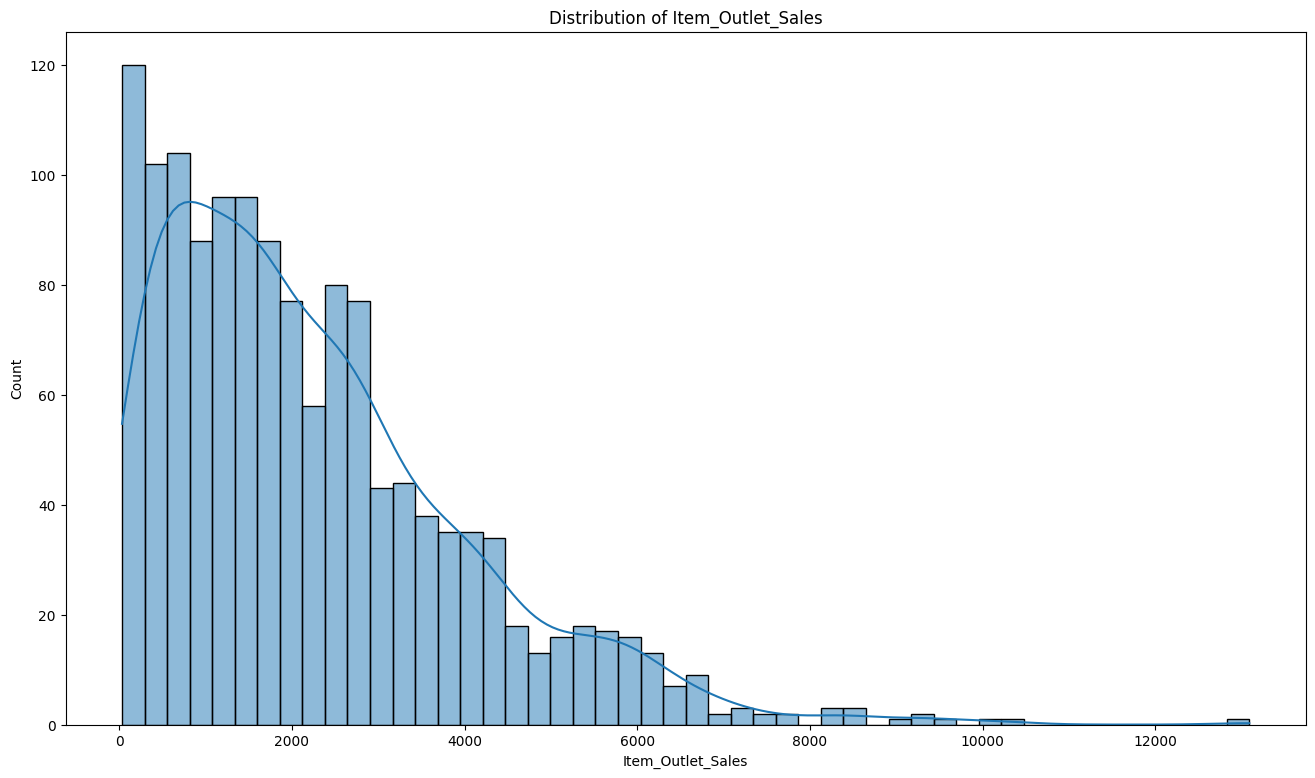

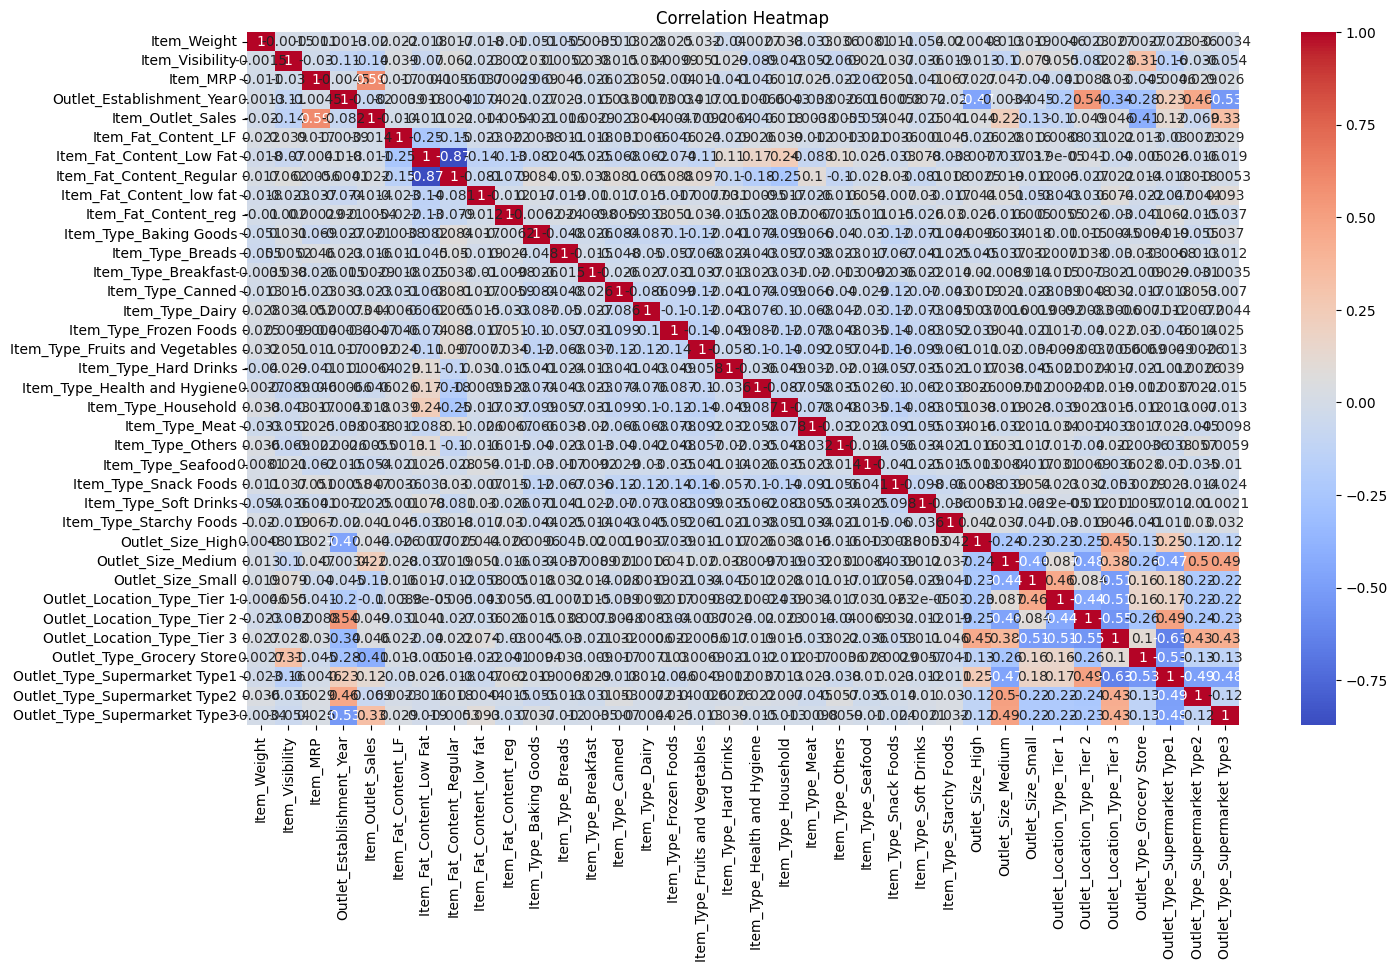

In [22]:
# Distribution of target variable
plt.figure(figsize=(16,9))
sns.histplot(train_data['Item_Outlet_Sales'], bins=50, kde=True)
plt.title("Distribution of Item_Outlet_Sales")
plt.show()

# Correlation heatmap
plt.figure(figsize=(16,9))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Split features and target**

In [12]:
# Target variable: Item_Outlet_Sales
train_x = train_data.drop(columns=['Item_Outlet_Sales'], axis=1)
train_y = train_data['Item_Outlet_Sales']

test_x = test_data.drop(columns=['Item_Outlet_Sales'], axis=1)
test_y = test_data['Item_Outlet_Sales']

**Train the Linear Regression model**

In [13]:
# Create and train the model
model = LinearRegression()
model.fit(train_x, train_y)

# Coefficients & Intercept
print('\nCoefficient of model :', model.coef_)
print('\nIntercept of model :', model.intercept_)



Coefficient of model : [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]

Intercept of model : -121926.97473298338


**Evaluation training data**

In [14]:
# Predictions on training data
predict_train = model.predict(train_x)
print('\nItem_Outlet_Sales on training data:\n', predict_train)

# RMSE on training dataset
rmse_train = mean_squared_error(train_y, predict_train) ** 0.5
print('\nRMSE on train dataset : ', rmse_train)


Item_Outlet_Sales on training data:
 [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]

RMSE on train dataset :  1135.8159344155245


**Evaluation of test data**

In [15]:
# Predictions on test data
predict_test = model.predict(test_x)
print('\nItem_Outlet_Sales on test data:\n', predict_test)

# RMSE on testing dataset
rmse_test = mean_squared_error(test_y, predict_test) ** 0.5
print('\nRMSE on test dataset : ', rmse_test)



Item_Outlet_Sales on test data:
 [ 1615.37962439  3168.60806673  2564.31326686  2685.29698657
  2771.82059109  4223.3788671   2615.10827403   565.8088248
  4000.68496927  1035.54578573  2184.60316447  1033.54185437
   150.22804639  1616.19932803  2370.37858454  1953.693325
  2307.09514556  1429.85271583  2343.42149697  3780.28905363
   583.44339124  1089.08346168  2323.64661483  3559.90832258
  1829.46789667  1602.03985138   840.70282292  1823.14253132
  3145.30906529  1823.30397678  2103.35401623  3025.02597477
  2265.03907268   697.33936172  4474.05156681  2270.45195749
  1897.45212218  3305.0110824   2228.36615412  3767.90052861
  2162.33844917   665.40410258  -926.22966666   738.30407877
   197.90808777  2483.25075805  3693.05388376  2458.43116228
  1329.02544771   -57.67123156  1952.26612825  3614.4167807
  2127.22359714  2486.1932574   1826.90446272   786.7283994
  3200.67525412  1981.66000538  2326.98747373  3535.12951812
    53.4756877    129.4629475   4259.8975191   3732.1522

**Actual vs Predicted (Train Data)**

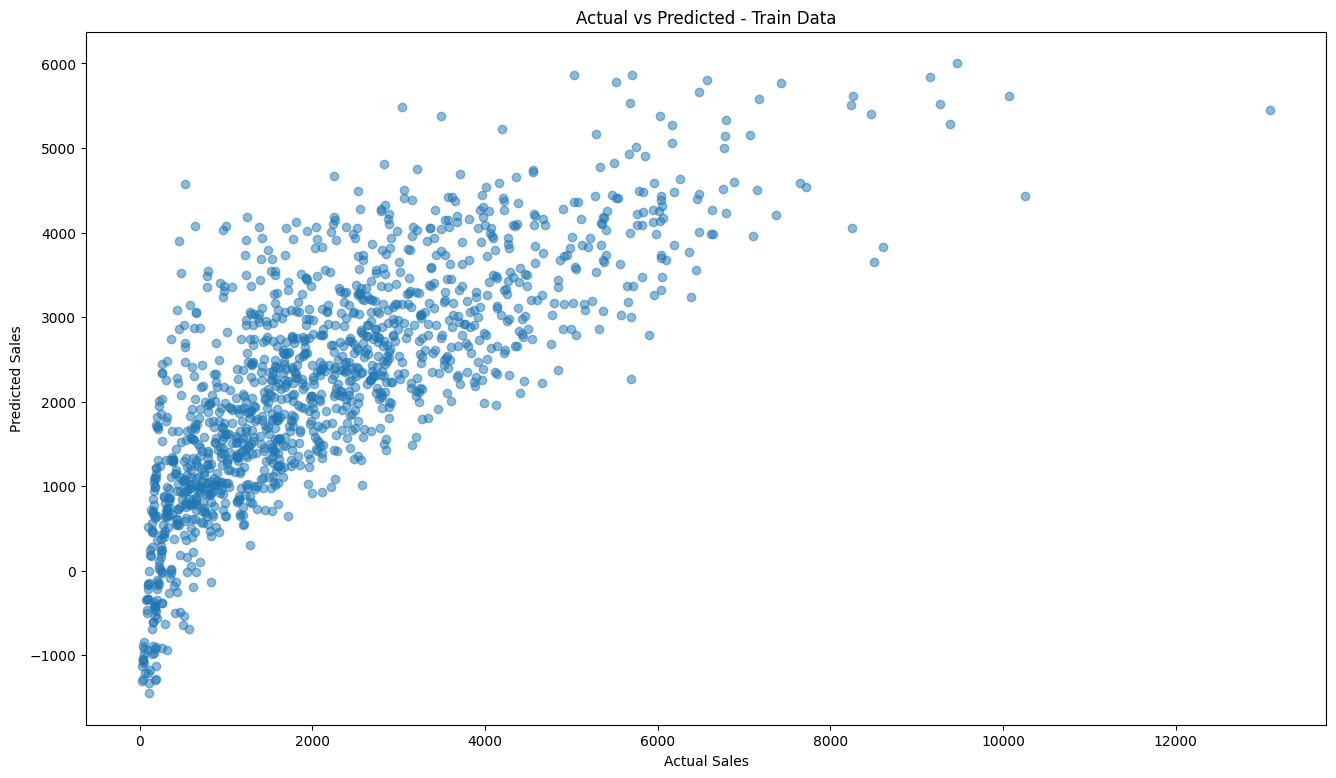

In [23]:
plt.figure(figsize=(16,9))
plt.scatter(train_y, predict_train, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted - Train Data")
plt.show()


**Part D: Actual vs Predicted (Test Data)**

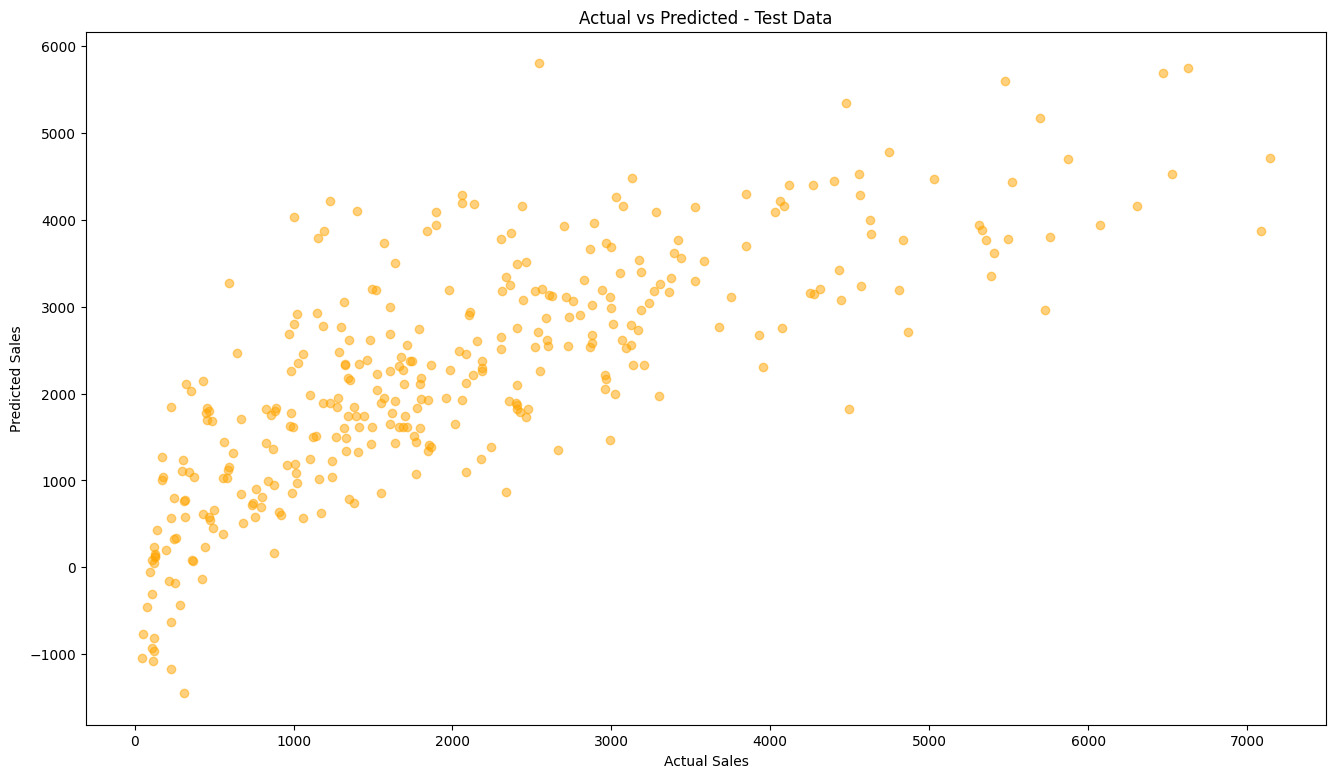

In [24]:
plt.figure(figsize=(16,9))
plt.scatter(test_y, predict_test, alpha=0.5, color="orange")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted - Test Data")
plt.show()
